In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
np.random.seed(42)
num_periods = 20

In [12]:
# Assumptions for LBO inputs
initial_debt = 1000000  # Starting debt
initial_equity = 500000  # Starting equity
interest_rate = 0.05
revenue_growth = np.random.uniform(0.02, 0.1, num_periods)
operating_margin = 0.2
exit_multiple = 10

In [13]:
# Generate synthetic revenue and cash flows
revenues = 1000000 * np.cumprod(1 + revenue_growth)
operating_profits = revenues * operating_margin
cash_flows = operating_profits * (1 - interest_rate)

In [14]:
# Create LBO DataFrame
lbo_data = pd.DataFrame({
    'Period': np.arange(1, num_periods + 1),
    'Revenue': revenues,
    'Operating Profit': operating_profits,
    'Cash Flow': cash_flows
})

In [15]:
class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.99):
        self.q_table = defaultdict(lambda: np.zeros(2))  # Two actions: Repay or Hold
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return np.random.choice([0, 1])  # Random action
        return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

    def decay_exploration(self):
        self.exploration_rate *= self.exploration_decay


In [19]:
# Initialize Q-learning agent
agent = QLearningAgent()

# Simulation of debt repayment
states = []
actions = []
rewards = []

debt = initial_debt
equity = initial_equity

for period in range(num_periods):
    state = (round(debt, -4), round(equity, -4))
    action = agent.choose_action(state)
    actions.append(action)

    # Action: 0 = Hold debt, 1 = Repay debt
    if action == 1:
        repayment = min(debt, cash_flows[period])
        debt -= repayment
        equity += repayment
    else:
        repayment = 0
        # Calculate reward (maximize equity value at exit)
    reward = equity + debt * (1 + interest_rate) * (exit_multiple - 1)
    rewards.append(reward)

    next_state = (round(debt, -4), round(equity, -4))
    agent.update_q_table(state, action, reward, next_state)
    agent.decay_exploration()

    states.append(state)

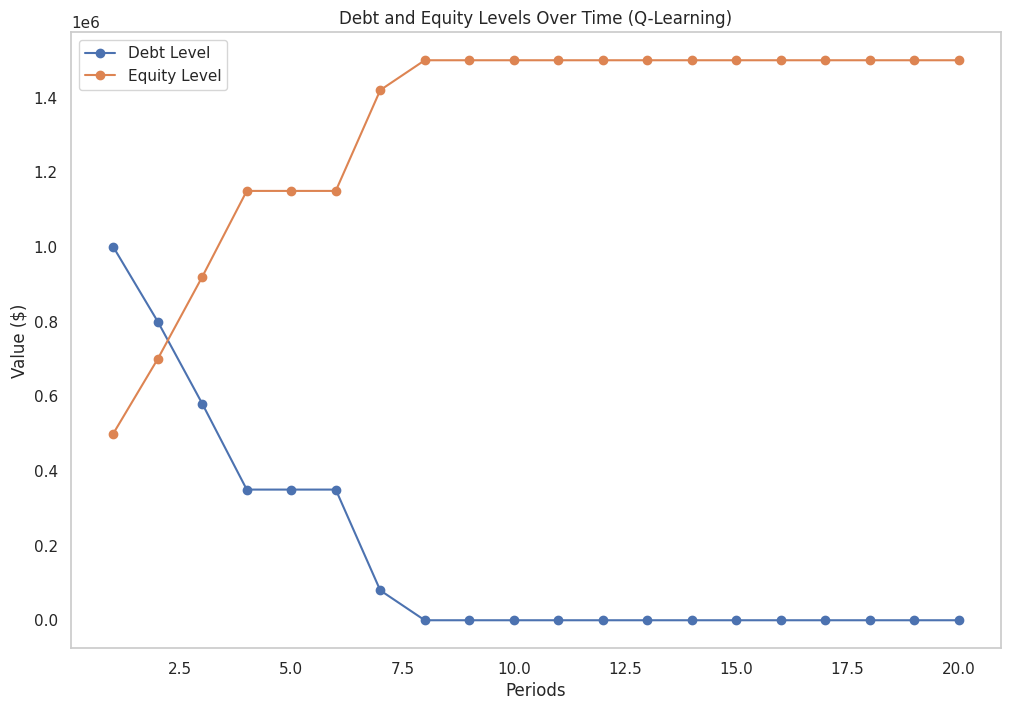

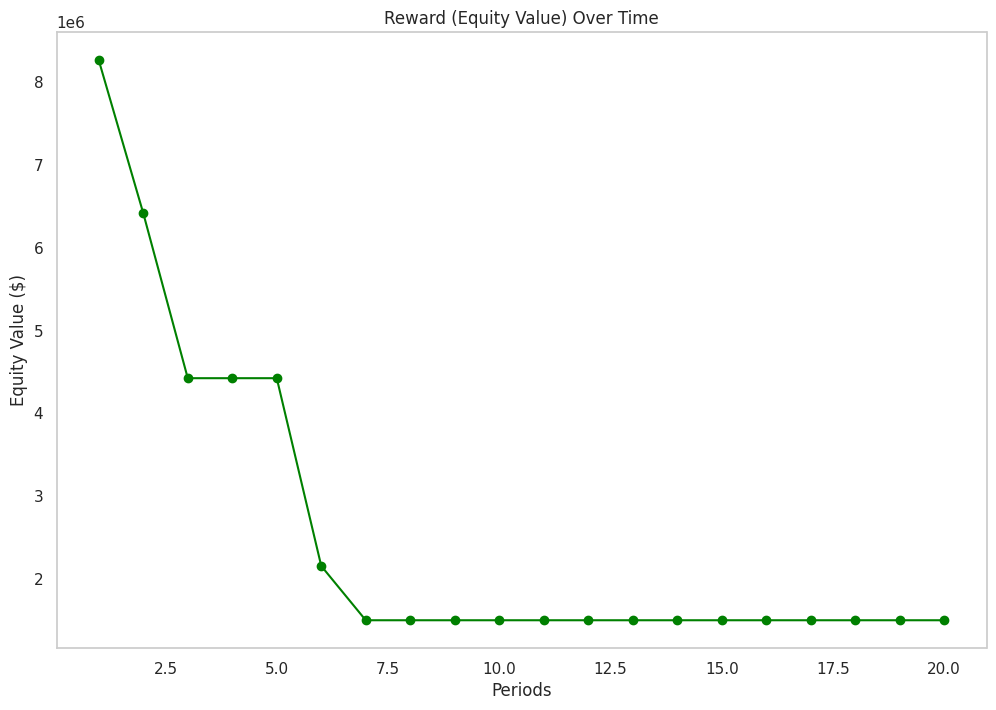

In [20]:
# Step 3: Visualizations
plt.figure(figsize=(12, 8))
plt.plot(lbo_data['Period'], [s[0] for s in states], label='Debt Level', marker='o')
plt.plot(lbo_data['Period'], [s[1] for s in states], label='Equity Level', marker='o')
plt.title('Debt and Equity Levels Over Time (Q-Learning)')
plt.xlabel('Periods')
plt.ylabel('Value ($)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(lbo_data['Period'], rewards, label='Reward (Equity Value at Exit)', marker='o', color='green')
plt.title('Reward (Equity Value) Over Time')
plt.xlabel('Periods')
plt.ylabel('Equity Value ($)')
plt.grid()
plt.show()
